# CNN with 2.15 Tensorflow

## Install Dependencies

In [3]:
!pip install tensorflow==2.15.0

  Using cached tensorflow-2.15.0-cp39-cp39-win_amd64.whl.metadata (3.6 kB)
  Using cached tensorflow_intel-2.15.0-cp39-cp39-win_amd64.whl.metadata (5.1 kB)
Using cached tensorflow-2.15.0-cp39-cp39-win_amd64.whl (2.1 kB)
Using cached tensorflow_intel-2.15.0-cp39-cp39-win_amd64.whl (300.8 MB)


In [36]:
print(tf.__version__)

2.15.0


In [4]:
pip show tensorflow

Name: tensorflow
Version: 2.15.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\hp\miniconda3\envs\main-ds\lib\site-packages
Requires: tensorflow-intel
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [37]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint


## Konfigurasi Direktori

### Cleaning Data & Load Data

In [28]:
data_dir = 'data' 

In [31]:
from PIL import Image
import os

def remove_corrupted_images(directory):
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(('jpg', 'jpeg', 'png')):
                file_path = os.path.join(root, file)
                try:
                    with Image.open(file_path) as img:
                        img.verify()  # Verifikasi bahwa gambar tidak rusak
                except (IOError, SyntaxError):
                    print(f'Menghapus gambar yang rusak: {file_path}')
                    os.remove(file_path)  # Hapus gambar yang rusak

# Jalankan fungsi pada direktori yang berisi gambar-gambar Anda
remove_corrupted_images('./data')  # Ganti dengan path direktori Anda


In [32]:
from PIL import Image
import os

def check_images(directory):
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(('jpg', 'jpeg', 'png')):
                file_path = os.path.join(root, file)
                try:
                    with Image.open(file_path) as img:
                        img.verify()
                except (IOError, SyntaxError) as e:
                    print('Bad file:', file_path)

check_images('./data')  # Ganti dengan path direktori Anda


In [33]:
import os

base_dir = './data'

dirs = {char+'_dir': os.path.join(base_dir, char) for char in ['ha', 'na', 'ca', 'ra', 'ka', 'da', 'ta', 'sa', 'wa', 'la', 'pa', 'dha', 'ja', 'ya', 'nya', 'ma', 'ga', 'ba', 'tha', 'nga']}
ha_dir = os.path.join(base_dir, 'ha')
na_dir = os.path.join(base_dir, 'na')
ca_dir = os.path.join(base_dir, 'ca')
ra_dir = os.path.join(base_dir, 'ra')
ka_dir = os.path.join(base_dir, 'ka')
da_dir = os.path.join(base_dir, 'da')
ta_dir = os.path.join(base_dir, 'ta')
sa_dir = os.path.join(base_dir, 'sa')
wa_dir = os.path.join(base_dir, 'wa')
la_dir = os.path.join(base_dir, 'la')
pa_dir = os.path.join(base_dir, 'pa')
dha_dir = os.path.join(base_dir, 'dha')
ja_dir = os.path.join(base_dir, 'ja')
ya_dir = os.path.join(base_dir, 'ya')
nya_dir = os.path.join(base_dir, 'nya')
ma_dir = os.path.join(base_dir, 'ma')
ga_dir = os.path.join(base_dir, 'ga')
ba_dir = os.path.join(base_dir, 'ba')
tha_dir = os.path.join(base_dir, 'tha')
nga_dir = os.path.join(base_dir, 'nga')

for char, char_dir in dirs.items():
    print(f"total training {char} images:", len(os.listdir(char_dir)))


ha_files = os.listdir(ha_dir)
print(ha_files[:10])

na_files = os.listdir(na_dir)
print(na_files[:10])

ca_files = os.listdir(ca_dir)
print(ca_files[:10])

ra_files = os.listdir(ra_dir)
print(ra_files[:10])

ka_files = os.listdir(ka_dir)
print(ka_files[:10])

da_files = os.listdir(da_dir)
print(da_files[:10])

ta_files = os.listdir(ta_dir)
print(ta_files[:10])

sa_files = os.listdir(sa_dir)
print(sa_files[:10])

wa_files = os.listdir(wa_dir)
print(wa_files[:10])

la_files = os.listdir(la_dir)
print(la_files[:10])

pa_files = os.listdir(pa_dir)
print(pa_files[:10])

dha_files = os.listdir(dha_dir)
print(dha_files[:10])

ja_files = os.listdir(ja_dir)
print(ja_files[:10])

ya_files = os.listdir(ya_dir)
print(ya_files[:10])

nya_files = os.listdir(nya_dir)
print(nya_files[:10])

ma_files = os.listdir(ma_dir)
print(ma_files[:10])

ga_files = os.listdir(ga_dir)
print(ga_files[:10])

ba_files = os.listdir(ba_dir)
print(ba_files[:10])

tha_files = os.listdir(tha_dir)
print(tha_files[:10])

nga_files = os.listdir(nga_dir)
print(nga_files[:10])

total training ha_dir images: 204
total training na_dir images: 211
total training ca_dir images: 211
total training ra_dir images: 208
total training ka_dir images: 211
total training da_dir images: 211
total training ta_dir images: 208
total training sa_dir images: 211
total training wa_dir images: 211
total training la_dir images: 210
total training pa_dir images: 209
total training dha_dir images: 209
total training ja_dir images: 210
total training ya_dir images: 211
total training nya_dir images: 210
total training ma_dir images: 211
total training ga_dir images: 210
total training ba_dir images: 217
total training tha_dir images: 209
total training nga_dir images: 205
['4693335674404368252_base64_5.png', '4693340161012711825_base64_5.png', '4693350885715757021_base64_5.png', '4693358261014228548_base64_5.png', '4693360511011442821_base64_5.png', '4693362338961252252_base64_5.png', '4693373627497522149_base64_5.png', '4693375707324818184_base64_5.png', '4693384475653021540_base64

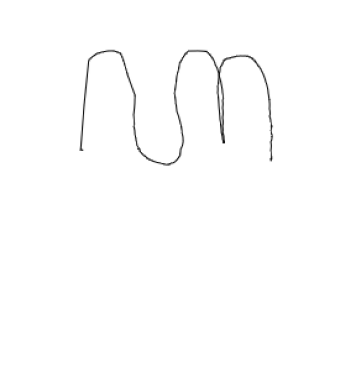

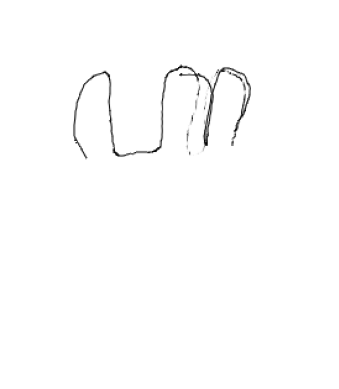

In [35]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_ha = [os.path.join(ha_dir, fname)
                for fname in ha_files[pic_index-2:pic_index]]
next_na = [os.path.join(na_dir, fname)
                for fname in na_files[pic_index-2:pic_index]]

next_ca = [os.path.join(ca_dir, fname) 
           for fname in ca_files[pic_index-2:pic_index]]
next_ra = [os.path.join(ra_dir, fname) for fname in ra_files[pic_index-2:pic_index]]
next_ka = [os.path.join(ka_dir, fname) for fname in ka_files[pic_index-2:pic_index]]
next_da = [os.path.join(da_dir, fname) for fname in da_files[pic_index-2:pic_index]]
next_ta = [os.path.join(ta_dir, fname) for fname in ta_files[pic_index-2:pic_index]]
next_sa = [os.path.join(sa_dir, fname) for fname in sa_files[pic_index-2:pic_index]]
next_wa = [os.path.join(wa_dir, fname) for fname in wa_files[pic_index-2:pic_index]]
next_la = [os.path.join(la_dir, fname) for fname in la_files[pic_index-2:pic_index]]
next_pa = [os.path.join(pa_dir, fname) for fname in pa_files[pic_index-2:pic_index]]
next_dha = [os.path.join(dha_dir, fname) for fname in dha_files[pic_index-2:pic_index]]
next_ja = [os.path.join(ja_dir, fname) for fname in ja_files[pic_index-2:pic_index]]
next_ya = [os.path.join(ya_dir, fname) for fname in ya_files[pic_index-2:pic_index]]
next_nya = [os.path.join(nya_dir, fname) for fname in nya_files[pic_index-2:pic_index]]
next_ma = [os.path.join(ma_dir, fname) for fname in ma_files[pic_index-2:pic_index]]
next_ga = [os.path.join(ga_dir, fname) for fname in ga_files[pic_index-2:pic_index]]
next_ba = [os.path.join(ba_dir, fname) for fname in ba_files[pic_index-2:pic_index]]
next_tha = [os.path.join(tha_dir, fname) for fname in tha_files[pic_index-2:pic_index]]
next_nga = [os.path.join(nga_dir, fname) for fname in nga_files[pic_index-2:pic_index]]


for i, img_path in enumerate(next_ha):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

2.15.0


In [25]:
img_width, img_height = 150, 150
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    horizontal_flip=True,
    rotation_range=10,
    zoom_range=0.2
)

train_dataset = train_datagen.flow_from_directory(
    './data',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='sparse',
    subset='training'
)

validation_dataset = train_datagen.flow_from_directory(
    './data',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='sparse',
    subset='validation'
)


Found 3363 images belonging to 20 classes.
Found 833 images belonging to 20 classes.


In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.regularizers import l2

model = tf.keras.models.Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.5),

    Conv2D(512, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.5),

    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(20, activation='softmax')
])

# Print the model summary
model.summary()

# Set the training parameters
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 148, 148, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 dropout_2 (Dropout)         (None, 74, 74, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 72, 72, 64)        2

In [4]:
from tensorflow.keras.utils import image_dataset_from_directory

img_width = 150
img_height = 150

from tensorflow.keras.utils import image_dataset_from_directory

# Membuat dataset pelatihan dan validasi
train_dataset = image_dataset_from_directory(
    './data',
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_width, img_height),
    batch_size=32)

validation_dataset = image_dataset_from_directory(
    './data',
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_width, img_height),
    batch_size=32)

# Callback untuk early stopping, reduce learning rate, dan model checkpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

# Training model
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=[early_stopping, reduce_lr, model_checkpoint]
)


# Evaluasi model
loss, accuracy = model.evaluate(validation_dataset)
print(f'Validation accuracy: {accuracy:.2f}')

Found 4196 files belonging to 20 classes.
Using 3357 files for training.
Found 4196 files belonging to 20 classes.
Using 839 files for validation.
Epoch 1/100
105/105 [==============================] - 329s 3s/step - loss: 4.4275 - accuracy: 0.1379 - val_loss: 3.1381 - val_accuracy: 0.3373 - lr: 0.0010
Epoch 2/100
105/105 [==============================] - 279s 3s/step - loss: 3.3285 - accuracy: 0.3372 - val_loss: 2.6671 - val_accuracy: 0.4517 - lr: 0.0010
Epoch 3/100
105/105 [==============================] - 272s 3s/step - loss: 2.7327 - accuracy: 0.4781 - val_loss: 2.1278 - val_accuracy: 0.6138 - lr: 0.0010
Epoch 4/100
105/105 [==============================] - 277s 3s/step - loss: 2.3950 - accuracy: 0.5562 - val_loss: 2.3506 - val_accuracy: 0.5685 - lr: 0.0010
Epoch 5/100
105/105 [==============================] - 354s 3s/step - loss: 2.0388 - accuracy: 0.6494 - val_loss: 1.8339 - val_accuracy: 0.6925 - lr: 0.0010
Epoch 6/100
105/105 [==============================] - 295s 3s/step 

In [6]:
import matplotlib.pyplot as plt

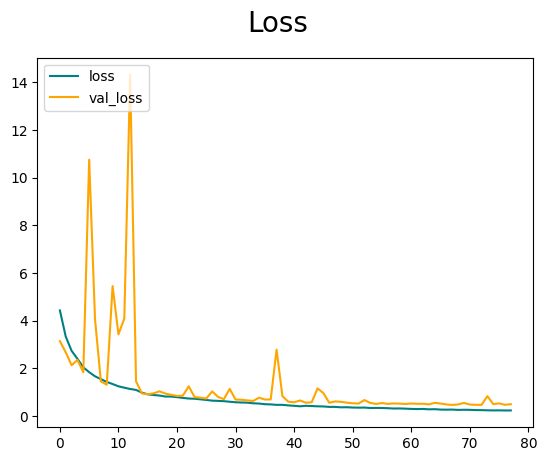

In [7]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

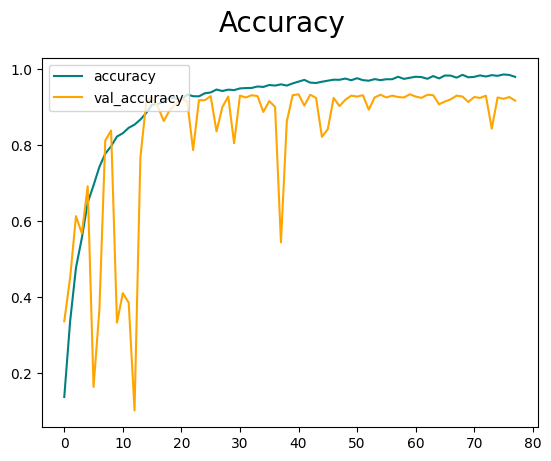

In [8]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [9]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Fungsi untuk memuat dan mempersiapkan gambar
def load_and_prepare_image(file_path, img_width, img_height):
    img = image.load_img(file_path, target_size=(img_width, img_height))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Membuat batch yang terdiri dari satu gambar
    return img_array

# Memprediksi gambar baru
file_path = 'tha.png'  # Ganti dengan path ke gambar yang ingin diprediksi
img_width, img_height = 150, 150  # Ganti dengan dimensi yang sesuai dengan model
img_array = load_and_prepare_image(file_path, img_width, img_height)

predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions, axis=1)

# Mendapatkan nama kelas dari class _names
predicted_class_name = train_dataset.class_names[predicted_class_index[0]]

print(f"Prediksi huruf hijaiyah: {predicted_class_name}")


1/1 [==============================] - 1s 1s/step
Prediksi huruf hijaiyah: tha


In [1]:
model.save('model.keras')

NameError: name 'model' is not defined

In [11]:
# Muat model yang telah disimpan dengan compile=False
model = tf.keras.models.load_model('modelC.keras', compile=False)

# Konversi model ke TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Simpan model TensorFlow Lite
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmp7pocvbfp\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmp7pocvbfp\assets
